# MNIST Diffusion Model

In [1]:
import torch

from torch_geometry.riemannian.prob_geodesics import ProbGEORCE, ProbEuclideanGEORCE
from torch_geometry.riemannian.prob_geodesics import TorchOptimization, TorchEuclideanOptimization
from torch_geometry.riemannian.manifolds import nSphere

In [2]:
import torch

from mnist_diffusion.model import MNISTDiffusion
from mnist_diffusion.train_mnist import create_mnist_dataloaders

In [3]:
model = MNISTDiffusion(timesteps=1000,
                image_size=28,
                in_channels=1,
                base_dim=64,
                dim_mults=[2,4]).to("cpu")

In [4]:
PATH = 'mnist_diffusion/results/steps_00046900.pt'

In [5]:
checkpoint = torch.load(PATH, weights_only=False, map_location=torch.device('cpu'))

In [6]:
model.load_state_dict(checkpoint['model'])
model.eval()

MNISTDiffusion(
  (model): Unet(
    (init_conv): ConvBnSiLu(
      (module): Sequential(
        (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
    )
    (time_embedding): Embedding(1000, 256)
    (encoder_blocks): ModuleList(
      (0): EncoderBlock(
        (conv0): Sequential(
          (0): ResidualBottleneck(
            (branch1): Sequential(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ConvBnSiLu(
                (module): Sequential(
                  (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
                  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (2): SiLU(inplace=True)
          

In [7]:
train_dataloader,test_dataloader=create_mnist_dataloaders(batch_size=64,image_size=28)

In [8]:
for j,(image,target) in enumerate(train_dataloader):
    break

In [9]:
torch.randint(0,1000,(image.shape[0],))

tensor([170, 158, 997, 279, 447, 579,  77, 721, 649,  10, 508, 894, 378, 458,
        537, 932, 966, 672, 619,  65, 327, 538, 707, 857, 213, 527, 272, 224,
        777,   2, 232, 692, 138, 424, 439, 195, 497, 873, 498, 787, 124, 541,
         40, 224, 250, 803, 180,  34, 922, 360, 320, 338, 256, 273,  88, 276,
        388,  22, 913,  52, 979, 777, 382, 552])

In [10]:
model.model(image, torch.ones(64, dtype=torch.int64)).shape

torch.Size([64, 1, 28, 28])

In [11]:
model.model(image, torch.ones(64, dtype=torch.int64))

tensor([[[[ 0.0490, -0.0127,  0.0022,  ..., -0.0024, -0.0187,  0.0578],
          [-0.0009, -0.0671, -0.0651,  ..., -0.0522, -0.0566, -0.0089],
          [-0.0112, -0.0426, -0.0456,  ..., -0.0584, -0.0813, -0.0304],
          ...,
          [-0.0073, -0.0377, -0.0508,  ..., -0.0505, -0.0568, -0.0021],
          [ 0.0314, -0.0417, -0.0388,  ..., -0.0664, -0.0681, -0.0302],
          [ 0.0218, -0.0510, -0.0450,  ..., -0.0582, -0.0120,  0.0468]]],


        [[[ 0.0510, -0.0099,  0.0045,  ..., -0.0061, -0.0228,  0.0488],
          [ 0.0011, -0.0643, -0.0599,  ..., -0.0527, -0.0569, -0.0098],
          [-0.0110, -0.0406, -0.0401,  ..., -0.0541, -0.0756, -0.0270],
          ...,
          [-0.0069, -0.0480, -0.0467,  ..., -0.0482, -0.0568, -0.0061],
          [ 0.0340, -0.0434, -0.0442,  ..., -0.0637, -0.0696, -0.0356],
          [ 0.0353, -0.0494, -0.0450,  ..., -0.0560, -0.0140,  0.0470]]],


        [[[ 0.0464, -0.0104,  0.0053,  ..., -0.0050, -0.0151,  0.0634],
          [ 0.0007, -0.064

In [12]:
model.model(image[0].reshape(1,1,28,28), torch.ones(1, dtype=torch.int64)).shape

torch.Size([1, 1, 28, 28])

In [13]:
betas=model._cosine_variance_schedule(1000)
alphas=1.-betas
alphas_cumprod=torch.cumprod(alphas,dim=-1)

In [14]:
t0 = 1
alphas_cumprod[t0]

tensor(0.9999)

In [15]:
def score_fun(x,t):
    
    x = x.reshape(-1,1,28,28)
    
    eps = model.model(x.reshape(-1,1,28,28), t*torch.ones(x.shape[0], dtype=torch.int64)).reshape(-1)
    den = torch.sqrt(1-alphas_cumprod[t])
                   
    return -eps/den
    

In [16]:
score_fun(image[0], 1)

tensor([-5.2466e+00,  1.3559e+00, -2.3872e-01,  9.4982e-01,  2.1236e+00,
         9.1434e-01,  9.1391e-01,  9.0392e-01,  9.2279e-01,  1.0896e+00,
         6.8778e-01, -1.1119e-01, -1.1489e-01,  9.0330e-01,  1.2162e+00,
         2.1092e-01,  3.1610e-01,  1.2393e+00,  1.3019e+00,  5.3153e-01,
         9.1160e-04,  5.7810e-01,  1.3236e+00,  8.8487e-01,  5.4321e-01,
         2.6083e-01,  2.0037e+00, -6.1825e+00,  9.2888e-02,  7.1732e+00,
         6.9674e+00,  6.0441e+00,  5.9747e+00,  5.0643e+00,  5.3609e+00,
         5.6323e+00,  5.6096e+00,  5.5566e+00,  6.3704e+00,  5.8165e+00,
         5.1250e+00,  4.7669e+00,  5.4468e+00,  5.6668e+00,  6.0897e+00,
         7.1207e+00,  6.1834e+00,  5.0942e+00,  5.5249e+00,  5.8868e+00,
         5.5784e+00,  5.3190e+00,  6.6934e+00,  5.5833e+00,  6.0539e+00,
         9.4752e-01,  1.1945e+00,  4.5563e+00,  4.8822e+00,  5.4131e+00,
         5.3590e+00,  4.8698e+00,  5.3490e+00,  5.8960e+00,  5.3307e+00,
         5.0947e+00,  5.5732e+00,  2.7221e+00,  4.2

In [17]:
init_val = torch.normal(torch.zeros((99,784)), torch.ones(784))

In [18]:
init_val.shape

torch.Size([99, 784])

In [19]:
t0 = 0.01
M_ProbGEORCE = ProbEuclideanGEORCE(score_fun = lambda z: score_fun(z,1),#lambda z: score_fun(z,t0),
                                    init_fun=None,#lambda *args: init_val,#None,
                                    lam=10.0,#,t0**4,
                                    T=100,
                                    max_iter=100,
                                    line_search_params={'rho': 0.1, 'max_iter': 100},
                                   )

In [24]:
t0 = 0.01
M_ProbTorch = TorchEuclideanOptimization(score_fun = lambda z: score_fun(z,1),#lambda z: score_fun(z,t0),
                                        init_fun=None,#lambda *args: init_val,#None,
                                        lam=50.0,#,t0**4,
                                        T=100,
                                        max_iter=1000,
                                       )

In [25]:
z0 = image[0].reshape(-1).detach()
zT = image[1].reshape(-1).detach()

In [28]:
M_ProbTorch.reg_energy(test[0][1:-1])

tensor(15.5506, grad_fn=<AddBackward0>)

In [27]:
test = M_ProbTorch(z0, zT)

0
273.7106018066406
1
3472.613525390625
2
318.4455871582031
3
849.9356689453125
4
1958.421630859375
5
1380.7667236328125
6
355.707763671875
7
104.05157470703125
8
621.339599609375
9
1000.5736083984375
10
797.0107421875
11
315.8206481933594
12
62.9185676574707
13
213.21046447753906
14
482.2017822265625
15
529.6819458007812
16
328.65972900390625
17
107.50538635253906
18
70.3865737915039
19
196.32847595214844
20
303.3755798339844
21
269.3908996582031
22
141.2621307373047
23
54.522010803222656
24
78.97319030761719
25
154.71786499023438
26
179.73440551757812
27
127.78521728515625
28
61.441715240478516
29
47.57952880859375
30
82.86078643798828
31
110.93099975585938
32
95.72242736816406
33
57.42432403564453
34
39.070335388183594
35
52.80799102783203
36
71.2156982421875
37
67.34030151367188
38
46.766845703125
39
34.46793746948242
40
40.42681121826172
41
50.271732330322266
42
48.18157958984375
43
36.873695373535156
44
30.390193939208984
45
33.89214324951172
46
38.6873664855957
47
36.32304763793

368
16.025985717773438
369
16.023221969604492
370
16.019365310668945
371
16.01568603515625
372
16.012317657470703
373
16.009021759033203
374
16.006011962890625
375
16.002971649169922
376
16.000438690185547
377
15.996810913085938
378
15.993396759033203
379
15.989456176757812
380
15.985401153564453
381
15.980707168579102
382
15.98348617553711
383
15.975107192993164
384
15.972972869873047
385
15.971006393432617
386
15.969164848327637
387
15.966676712036133
388
15.963960647583008
389
15.961738586425781
390
15.959444999694824
391
15.958368301391602
392
15.95678424835205
393
15.954029083251953
394
15.952259063720703
395
15.949678421020508
396
15.947432518005371
397
15.944544792175293
398
15.942167282104492
399
15.940496444702148
400
15.937891006469727
401
15.934600830078125
402
15.93136978149414
403
15.929130554199219
404
15.926902770996094
405
15.925849914550781
406
15.924020767211914
407
15.920289993286133
408
15.917862892150879
409
15.915997505187988
410
15.914146423339844
411
15.91221714

726
15.614850997924805
727
15.615301132202148
728
15.61320686340332
729
15.612255096435547
730
15.610153198242188
731
15.608997344970703
732
15.606424331665039
733
15.60556697845459
734
15.605413436889648
735
15.607012748718262
736
15.607441902160645
737
15.607361793518066
738
15.606069564819336
739
15.605998992919922
740
15.606657028198242
741
15.606759071350098
742
15.606335639953613
743
15.605976104736328
744
15.606283187866211
745
15.607179641723633
746
15.608146667480469
747
15.607830047607422
748
15.606565475463867
749
15.603422164916992
750
15.60024356842041
751
15.597370147705078
752
15.597244262695312
753
15.597999572753906
754
15.599783897399902
755
15.599530220031738
756
15.59872817993164
757
15.59703254699707
758
15.597139358520508
759
15.595954895019531
760
15.596563339233398
761
15.59496021270752
762
15.593873977661133
763
15.592700958251953
764
15.593372344970703
765
15.594188690185547
766
15.595038414001465
767
15.596793174743652
768
15.59865951538086
769
15.59978485107

In [32]:
t0 = 0.01
M_ProbGEORCE = ProbEuclideanGEORCE(score_fun = lambda z: score_fun(z,1),#lambda z: score_fun(z,t0),
                                    init_fun=lambda *args: test[0][1:-1],#None,
                                    lam=50.0,#,t0**4,
                                    T=100,
                                    max_iter=10,
                                    line_search_params={'rho': 0.5, 'max_iter': 100},
                                   )

In [33]:
test2 = M_ProbGEORCE(z0, zT)

501.6640930175781
0
100
23102.44921875
1


KeyboardInterrupt: 

In [33]:
test[-2]

In [34]:
test[1]

11.744451522827148

In [43]:
torch.linalg.norm(test[0][1:-1]-init_curve)

tensor(17.5633)

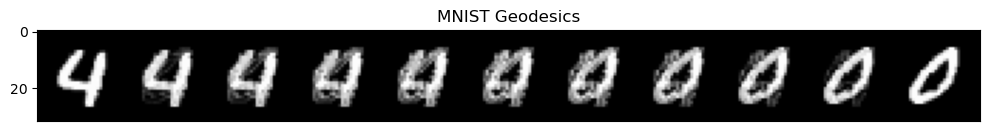

In [29]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

img_height = 28+2
tick_list = [img_height/2+j*img_height for j in range(10)]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title(f"MNIST Geodesics")
ax.imshow(vutils.make_grid(test[0].reshape(-1,1,28,28)[::10], padding=2, normalize=True, nrow=10+1).permute(1, 2, 0))
ax.axes.get_xaxis().set_visible(False)
#ax.set_yticks(tick_list)
#ax.set_yticklabels(length)

fig.tight_layout()

plt.show()


In [24]:
t0 = 0.01
M_ProbGeodesic = ProbEuclideanGEORCE(score_fun = lambda z: score_fun(z,1),#lambda z: score_fun(z,t0),
                                    init_fun=None,
                                    lam=10.0,#,t0**4,
                                    T=100,
                                    max_iter=1,
                                    line_search_params={'rho': 0.5},
                                   )

In [25]:
test = M_ProbGeodesic(z0, zT)

33.968379974365234
0
15
31.857494354248047
1


In [26]:
test[1]

31.857494354248047

In [27]:
test[-2]

64.57770538330078

In [28]:
test[0].shape

torch.Size([101, 784])

In [63]:
torch.linalg.norm(init_curve-test[0][1:-1])

tensor(1.5553)

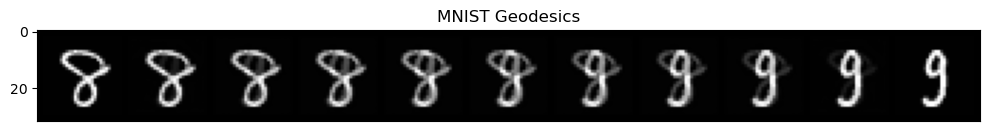

In [29]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

img_height = 28+2
tick_list = [img_height/2+j*img_height for j in range(10)]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title(f"MNIST Geodesics")
ax.imshow(vutils.make_grid(test[0].reshape(-1,1,28,28)[::10], padding=2, normalize=True, nrow=10+1).permute(1, 2, 0))
ax.axes.get_xaxis().set_visible(False)
#ax.set_yticks(tick_list)
#ax.set_yticklabels(length)

fig.tight_layout()

plt.show()


In [30]:
init_curve = torch.linspace(0.,1.,100+1)[1:-1].reshape(-1,1)*(zT.reshape(-1)-z0.reshape(-1))+z0.reshape(-1)

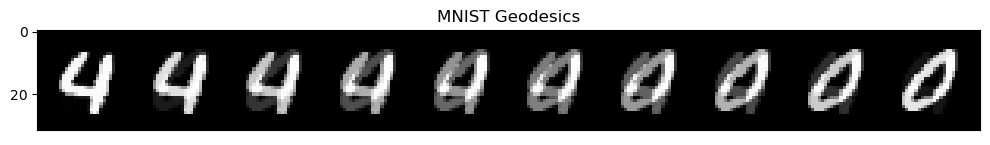

In [31]:



import matplotlib.pyplot as plt
import torchvision.utils as vutils

img_height = 28+2
tick_list = [img_height/2+j*img_height for j in range(10)]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_title(f"MNIST Geodesics")
ax.imshow(vutils.make_grid(init_curve.reshape(-1,1,28,28)[::10], padding=2, normalize=True, nrow=10+1).permute(1, 2, 0))
ax.axes.get_xaxis().set_visible(False)
#ax.set_yticks(tick_list)
#ax.set_yticklabels(length)

fig.tight_layout()

plt.show()
